In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
import time

In [22]:
# Estimate the following expected value: E(W_3^2 + sin(W_3) + 2e^{W_3})
# Where W_t is a standard Wiener process, that is the drift parameter is zero and the Variance parameter sigma^2 = 1.

# The expected value of a function of a Wiener process is given by the following formula:
# E[f(W_t)] = f(0) + ∫[0,t] f'(W_s) ds
# Where f'(W_s) is the derivative of f with respect to W_s.

# In this case, we have the following function:
# f(W_t) = W_t^2 + sin(W_t) + 2e^W_t
# Therefore, the expected value of f(W_3) is given by:
# E[f(W_3)] = f(0) + ∫[0,3] f'(W_s) ds
# E[f(W_3)] = 0 + ∫[0,3] (2W_s + cos(W_s) + 2e^W_s) ds
# E[f(W_3)] = ∫[0,3] (2W_s + cos(W_s) + 2e^W_s) ds

# We can estimate the expected value of f(W_3) by simulating a large number of Wiener processes and calculating the average of f(W_3) for each process.

# Number of Wiener processes to simulate
n = 1000
# Number of time steps
N = 1000
# Time step size
dt = 3 / N
# Time points
t = np.linspace(0, 3, N+1)
# Wiener processes
W = np.zeros((n, N+1))
# Expected value of f(W_3)
E_f_W_3 = 0
# Simulate Wiener processes
for i in range(n):
    for j in range(N):
        W[i, j+1] = W[i, j] + np.sqrt(dt)*np.random.normal(0, 1)
    E_f_W_3 += 2*W[i, -1] + np.cos(W[i, -1]) + 2*np.exp(W[i, -1])
E_f_W_3 /= n
print('Estimated expected value of f(W_3):', E_f_W_3)

Estimated expected value of f(W_3): 9.432503315782872


In [23]:
# Let S𝑡 be a Geometric Brownian Motion process: S_t = S_0e^{sigma W_t + (r-sigma^2/2)t} 
# where r = 0.05, sigma = 0.2, S_0 = 90, and W_t is a standard Wiener process. Estimate
# E[S_3].

# Number of Geometric Brownian Motion processes to simulate
n = 1000
# Number of time steps
N = 1000
# Time step size
dt = 1 / N
# Time points
t = np.linspace(0, 3, N+1)
# Geometric Brownian Motion processes
S = np.zeros((n, N+1))
# Expected value of S_3
E_S_3 = 0
# Simulate Geometric Brownian Motion processes
for i in range(n):
    for j in range(N):
        S[i, j+1] = S[i, j] + 0.05*S[i, j]*dt + 0.2*S[i, j]*np.sqrt(dt)*np.random.normal(0, 1)
    E_S_3 += S[i, -1]
E_S_3 /= n
print('Estimated expected value of S_3:', E_S_3)

Estimated expected value of S_3: 0.0


In [24]:
# Evaluate the following expected value and probability:
# E[X_2^0.6] and P(X_2 > 2)
# Where the Ito's Processes evolve according to the following stochastic differential equation:
# dX_t = (1/4 + 1/3X_t)dt + 3/5dW_t, X_0 = 2
# and W_t is a standard Wiener process.

# Number of Ito's Processes to simulate
n = 1000
# Number of time steps
N = 1000
# Time step size
dt = 2 / N
# Time points
t = np.linspace(0, 2, N+1)
# Ito's Processes
X = np.zeros((n, N+1))
# Expected value of X_2^0.6
E_X_2_06 = 0
# Probability of X_2 > 2
P_X_2_gt_2 = 0
# Simulate Ito's Processes
for i in range(n):
    for j in range(N):
        X[i, j+1] = X[i, j] + (1/4 + 1/3*X[i, j])*dt + 3/5*np.sqrt(dt)*np.random.normal(0, 1)
    E_X_2_06 += np.maximum(X[i, -1], 0)**0.6
    if X[i, -1] > 2:
        P_X_2_gt_2 += 1
E_X_2_06 /= n
P_X_2_gt_2 /= n
print('Estimated expected value of X_2^0.6:', E_X_2_06)
print('Estimated probability of X_2 > 2:', P_X_2_gt_2)


Estimated expected value of X_2^0.6: 0.761843575043163
Estimated probability of X_2 > 2: 0.135


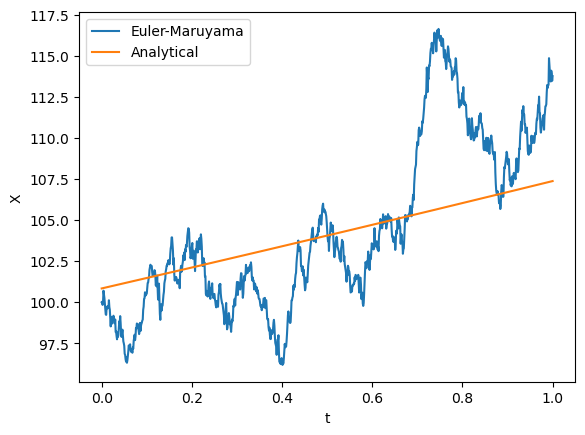

In [25]:
# Consider the following SDE:
# dX_t = aX_tdt + bX_tdW_t, X_0 = 100, a = 0.07, b = 0.12

# a) Simulate this stochastic process using the discretization schemes of Euler-Maruyama
# b) Compare with the analytical solution.

# a) Simulate the stochastic process using the discretization schemes of Euler-Maruyama
# Number of time steps
N = 1000
# Time step size
dt = 1 / N
# Time points
t = np.linspace(0, 1, N+1)
# Stochastic process
X = np.zeros(N+1)
# Initial condition
X[0] = 100
# Simulate the stochastic process
for i in range(N):
    X[i+1] = X[i] + 0.07*X[i]*dt + 0.12*X[i]*np.sqrt(dt)*np.random.normal(0, 1)
    
# b) Compare with the analytical solution
# Analytical solution
X_analytical = 100*np.exp((0.07 - 0.5*0.12**2)*t + 0.12*np.cumsum(np.sqrt(dt)*np.random.normal(0, 1)))
# Plot the results
plt.figure()
plt.plot(t, X, label='Euler-Maruyama')
plt.plot(t, X_analytical, label='Analytical')
plt.xlabel('t')
plt.ylabel('X')
plt.legend()
plt.show()

